# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

**Описание данных:**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах(м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Посчитаем-и-добавим-в-таблицу" data-toc-modified-id="Посчитаем-и-добавим-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитаем и добавим в таблицу</a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра." data-toc-modified-id="Цена-квадратного-метра.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена квадратного метра.</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления." data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления.</a></span></li><li><span><a href="#Этаж-квартиры;-варианты-—-первый,-последний,-другой." data-toc-modified-id="Этаж-квартиры;-варианты-—-первый,-последний,-другой.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Этаж квартиры; варианты — первый, последний, другой.</a></span></li><li><span><a href="#Cоотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей." data-toc-modified-id="Cоотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Cоотношение жилой и общей площади, а также отношение площади кухни к общей.</a></span></li></ul></li><li><span><a href="#Проведём-исследовательский-анализ-данных" data-toc-modified-id="Проведём-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведём исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим следующие параметры: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучим-время-продажи-квартиры" data-toc-modified-id="Изучим-время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим время продажи квартиры</a></span></li><li><span><a href="#Уберём-редкие-и-выбивающиеся-значения" data-toc-modified-id="Уберём-редкие-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уберём редкие и выбивающиеся значения</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры?</a></span></li><li><span><a href="#Изучим-предложения-квартир" data-toc-modified-id="Изучим-предложения-квартир-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучим предложения квартир</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></li></ul></div>

## Откроем файл с данными и изучим общую информацию

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t') #Разделим колонки параметром sep.Иначе данные будут не читаемы.

In [3]:
data.head() #Посмоторим общий вид таблицы с помощью вывода 5ти первых строк.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Большое** количество пропусков бросается в глаза. Воспользуемся параметром `info()`, что бы узнать на сколько их много и тип данных в стобцах. И параметром `describe`, для анализа числовых значений.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


`Вывод`

*Изучив данные был сделан предварительный план на предобработку:*

`first_day_exposition` - Вид данных вместо `object` должен быть `datetime`.

`ceiling_height` - Много пропусков. Минимальная высота 1м, а максимальная 100м.

`floors_total` -  Тип данных поменять на `int`. Есть не большее количество пропущенных значений. 

`is_apartment` - Тип данных поменять на `bool`. Много пропусков.

`living_area` - Пропуски. Минимальное значение выглядит странно.

`kitchen_area` - Пропуски. Минимальное значение выглядит странно.

`balcony` - Тип данных поменять на `int`. Много пропусков.

`locality_name` - Небольшое количество пропусков.

`airports_nearest` - Пропуски. Минимальное значение равное нулю. Поменять тип данных на `int`. 

`cityCenters_nearest` - Пропуски. Поменять тип данных на `int`.

`parks_around3000` - Поменять тип данных на `int`. Пропуски.

`parks_nearest` - Поменять тип данных на `int`. Много пропусков.

`ponds_around3000` - Поменять тип данных на `int`. Пропуски.

`ponds_nearest` - Поменять тип данных на `int`. Много пропусков.

`days_exposition` - Поменять тип данных на `int`. Пропуски.

`last_price`- Поменять тип данных на `int`.

## Предобработка данных

**Переведём** столбец с датой публикации в формат `datetime`без времени так, как оно не указано.

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

_______________________________________________________________________________________________________________________________
**Попробуем** разобраться с высотой потолков.

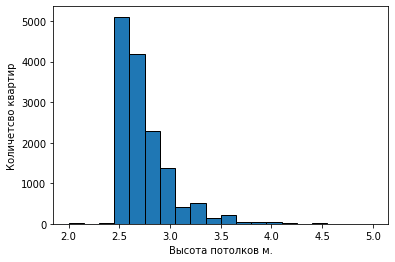

In [7]:
chh = data['ceiling_height'].plot(y = 'ceiling_height',
                                  kind = 'hist', 
                                  bins = 20, range=(2,5),
                                  ec='black'
                                 )
chh.set_xlabel('Высота потолков м.')
chh.set_ylabel('Количетсво квартир');
# выведем гистограмму для наглядности.

In [8]:
data[data['ceiling_height'] < 2] #Посмотри все квартиры с потолками ниже 2 метров.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [9]:
data[data['ceiling_height'] > 8] #Посмотрим все квартиры с потолками выше 8 метров.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN


**Потолки** выше восьми метров. Звучит не совсем реально, если только очень редкое исключение, а такие значения, как 20м, 25м, 27м и т.п скорее всего были сделаны случайно и предпологали 2.0м, 2.5м, 2.7м.

Заменим все нереальные значения и пропуски медианой.

In [10]:
data['ceiling_height'].median()

2.65

In [11]:
ceiling_median = data['ceiling_height'].median()
ceiling_low = [1, 1.2, 1.75]
ceiling_higt = data.query('ceiling_height > 10')['ceiling_height'].unique().tolist()

data['ceiling_height']=data['ceiling_height'].replace(ceiling_low, ceiling_median)
data['ceiling_height']=data['ceiling_height'].replace(ceiling_higt, ceiling_median)
data['ceiling_height']=data['ceiling_height'].fillna(ceiling_median)

In [12]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.697811
std          0.231773
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

**Отклонение** минимальное, среднее значение приблизилось к медиане и пропусков больше нет.

_______________________________________________________________________________________________________________________________
**Разберёмся** с этажами в доме.

In [13]:
data['floors_total'].isna().sum()

86

In [14]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [15]:
data[data['floors_total'].isna() & (data['floor'] > 20)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2392,7,5395770.0,53.00,2017-06-29,2,2.65,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
6030,3,10900000.0,116.23,2017-05-05,4,2.65,NaN,NaN,24,NaN,False,False,NaN,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0
7922,3,5426412.0,50.11,2016-06-08,2,2.65,NaN,26.94,24,NaN,False,False,11.13,0.0,Санкт-Петербург,7050.0,13266.0,1.0,868.0,0.0,NaN,14.0
8478,19,13500000.0,77.80,2019-04-17,2,2.80,NaN,39.41,21,NaN,False,False,13.27,2.0,Санкт-Петербург,12838.0,11477.0,1.0,593.0,1.0,130.0,NaN
10058,9,3350000.0,25.00,2018-09-10,1,2.65,NaN,17.00,21,NaN,False,False,3.50,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.0
13622,3,7650000.0,88.84,2016-05-21,3,2.65,NaN,49.87,21,NaN,False,False,9.76,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,42.0
14264,13,14000000.0,94.00,2019-01-23,6,2.65,NaN,51.00,23,NaN,False,False,16.30,NaN,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN
21753,7,6800000.0,57.00,2017-05-01,2,2.65,NaN,NaN,21,NaN,False,False,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0


**Изучив** данные можно предположить, что заполнять пропуски не нужно, но их всего 86 и они не повлияют на общую статистику, если мы заменим их на 25 этажные дома.

Из-за отсутсвия пропусков мы сможем поменять тип данных на `int`.

In [16]:
data['floors_total']=data['floors_total'].fillna(25).astype('int')

**Мы** не сможем заменить пустые значения в жилой площади. В 1903 объявлениях может быть много таких где общая площадь меньше медианы или среднего значения. 

Поэтому мы оставляем пропущенные значения.

_______________________________________________________________________________________________________________________________
**Попробуем** заполнить пропущенные значения в названии населённого пункта.

In [17]:
data['locality_name'].value_counts()

Санкт-Петербург                   15721
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Коробицыно                    1
деревня Щеглово                       1
деревня Нижняя                        1
деревня Чудской Бор                   1
поселок городского типа Рябово        1
Name: locality_name, Length: 364, dtype: int64

In [18]:
data['locality_name'].isna().sum()

49

In [19]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15,3,3.55,5,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30,3,2.65,4,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20,1,2.65,24,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11,2,2.65,24,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28,2,2.65,5,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09,2,3.00,8,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10,3,4.00,4,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14,3,2.65,7,NaN,6,NaN,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20,3,2.65,7,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29,1,2.65,24,20.00,23,NaN,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [20]:
data['locality_name']=data['locality_name'].fillna('Санкт-Петербург')

_______________________________________________________________________________________________________________________________
**Разберёмся** с пропусками в балконах.

In [21]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [22]:
data['balcony'].isna().sum()

11519

**Большое** количество пропусков. Предположим логичную замену, если человек не указал число балконов — скорее всего, их нет.

И заменим тип данных на `int`.

In [23]:
data['balcony']=data['balcony'].fillna(0).astype('int')

_______________________________________________________________________________________________________________________________
**Займёмся** апартаментами. Столбец апартаменты ,скорее всего, появился не вместе с началом ведения записей, апартаменты появились относительно недавно.

Все пропущенные значения заменим на `False`.

In [24]:
data['is_apartment'] = data['is_apartment'].fillna(False)

_______________________________________________________________________________________________________________________________
**Переходим** к числу парков в радиусе 3 км.

In [25]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [26]:
data['parks_around3000'].isna().sum()

5518

**Можно предположить**, что пропущенные значения означают отсутсвие парков в радиусе 3 км.

In [27]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

_______________________________________________________________________________________________________________________________
**Пропуски** в параметре `ponds_around3000` прировняем к их отсутствию.

In [28]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [29]:
data['ponds_around3000'].isna().sum()

5518

In [30]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

_______________________________________________________________________________________________________________________________
**Для** удобства изменим тип данных на `int` в цене на момент снятия с публикации.

In [31]:
data['last_price'] = data['last_price'].astype('int')

_______________________________________________________________________________________________________________________________
**Количетсво** дней размещено объявление. Важный параметр, но заменить пропуски не представялется вожможным. Прировнять к 0 нульзя сильно изменятся данные, а медиана и среднее не подходит.

In [32]:
data['days_exposition'].isna().sum()

3181

_______________________________________________________________________________________________________________________________
**Переходим** к столбцу с живой площадью.

In [33]:
data['living_area'].isna().sum()

1903

**Мы** не можем определить к какому населённому пункту относятся эти данные, но если мы прибавим такое мизерное значение к "Санкт-Петербург", то мы не повлияем на общую картину и заполним пропуски.

_______________________________________________________________________________________________________________________________
**Переходим** к кухням.

In [34]:
data['kitchen_area'].isna().sum()

2278

**Почти** 10% пропущенных данных, которые мы не сможем заполнить правильно. Оставляем как есть.

_______________________________________________________________________________________________________________________________
**Для удобства** создадим стобец с ростоянием до центра в км.

In [35]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
print('Среднее растояние до центра', data['cityCenters_nearest_km'].mean())
print('Медиана растояния до центра', data['cityCenters_nearest_km'].median())

Среднее растояние до центра 14.191277832783278
Медиана растояния до центра 13.098500000000001


In [36]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(13)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

_______________________________________________________________________________________________________________________________
**Пропуски** в таких парметрах, как:
`airports_nearest`,
`cityCenters_nearest`,
`parks_nearest`, 
`ponds_nearest`. Корректно заполнить не удалось. Оставляем,как есть.

Проверяем.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int32         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int32         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

**Вывод:**

Данные стали более удобные для работы, но к сожалению не идеальны. Работаем с тем, что есть.

## Посчитаем и добавим в таблицу

### Цена квадратного метра.

In [38]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].astype('int')

### День недели, месяц и год публикации объявления.

In [39]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

### Этаж квартиры; варианты — первый, последний, другой.

In [40]:
def floor_category(column):
    floors_total = column['floors_total']
    floor = column['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

### Cоотношение жилой и общей площади, а также отношение площади кухни к общей.

In [41]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

**Проверяем.**

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,18,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,13,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,6,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8,100000,1,6,2018,другой,0.320000,0.410000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int32         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int32         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

## Проведём исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков
_______________________________________________________________________________________________________________________________
**Площадь.**

In [44]:
plotly = px.data.tips()

In [45]:
def func_plotly(df, y):
    fig = px.violin(df, 
                y= y, 
                box=True
                )
    return fig   

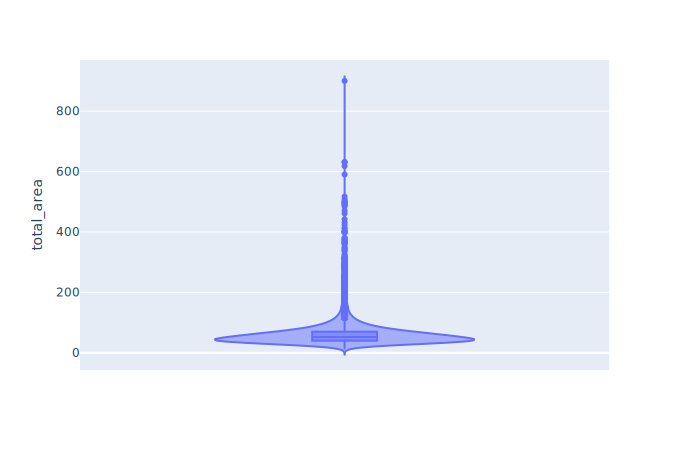

In [46]:
func_plotly(data, 'total_area')

In [47]:
def func_plot (df, y, range):
    hist = df.plot(y = y,
          kind = 'hist', 
          bins = 20, grid=True, 
          figsize = (5,3), 
          range = (0, range), 
          ec='black'
         )
    return hist  

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

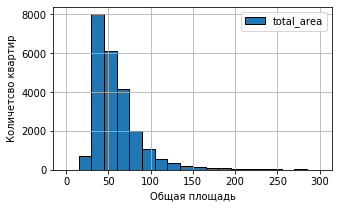

In [48]:
tah = func_plot(data, 'total_area', 300)
tah.set_xlabel('Общая площадь')
tah.set_ylabel('Количетсво квартир');
data['total_area'].describe()

**Распределение** данных нормальное, есть выбросы но они не сильно влияют на данные. Самое большое количество объявлений находится на 43м²-45м². Медиана не сильно отличается от среднено. А основная масса находится между 40м² и 70м².
_______________________________________________________________________________________________________________________________
**Цена**

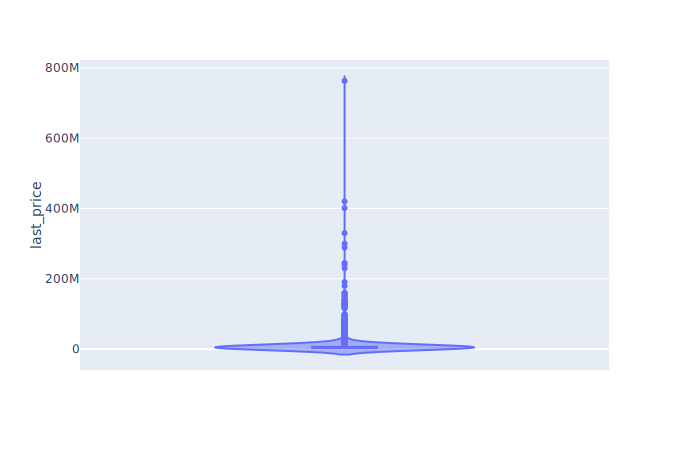

In [49]:
func_plotly(data, 'last_price')

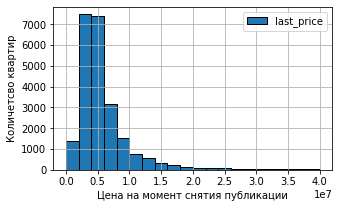

In [50]:
lph = func_plot(data, 'last_price', 40000000)
lph.set_xlabel('Цена на момент снятия публикации')
lph.set_ylabel('Количетсво квартир');

_______________________________________________________________________________________________________________________________
**Комнаты.**

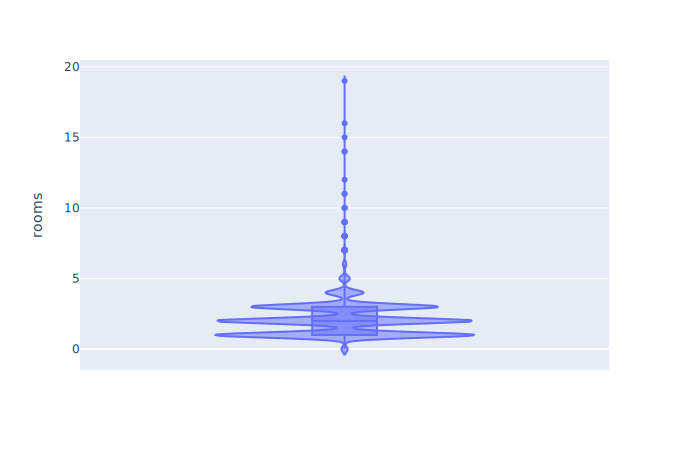

In [51]:
func_plotly(data, 'rooms')

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

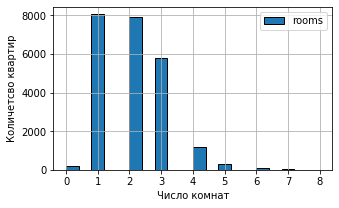

In [52]:
rh =  func_plot(data, 'rooms', 8)
rh.set_xlabel('Число комнат')
rh.set_ylabel('Количетсво квартир');
data['rooms'].describe()

**Нормальные данные** 1х, 2х, 3х комнатные преоблодают. Больше 6 комнат еденичные выбросы.
_______________________________________________________________________________________________________________________________
**Высота потолков.**

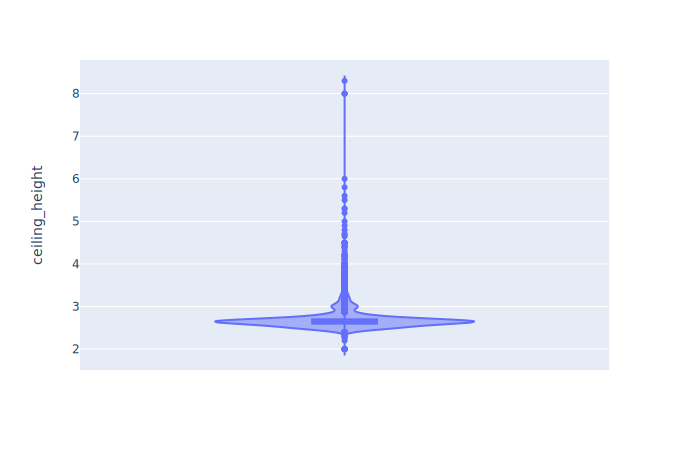

In [53]:
func_plotly(data, 'ceiling_height')

count    23699.000000
mean         2.697811
std          0.231773
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

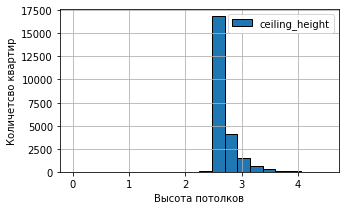

In [54]:
chh2 = func_plot(data, 'ceiling_height', 4.5)
chh2.set_xlabel('Высота потолков')
chh2.set_ylabel('Количетсво квартир');
data['ceiling_height'].describe()

**Отличное** распределение данных. Возможно из-за того, что мы их предобробатывали. 2,6м самый распространённый вариант. Скорее всего те у кого потолки 2,9м округляли до 3м. Поэтому получился правал.

**Вывод:**
Изучив следующие параметры: площадь, цена, число комнат, высота потолков. Построив гистограммы для каждого параметра. Мы заметили на всех гистограммах нормальное распределение данных (Гаусса).

Если вы вдруг заходите купить 1-2х комнатную квартиру площадью 45м² в Санкт-петербурге. Она обойдётся вам примерно в 5млн.

### Изучим время продажи квартиры

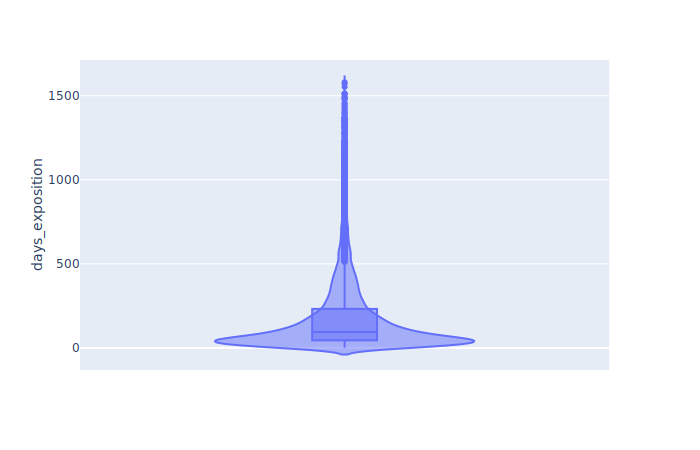

In [55]:
func_plotly(data, 'days_exposition')

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

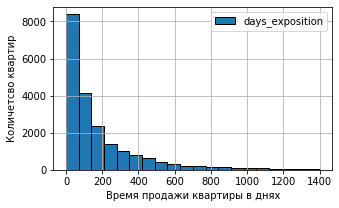

In [56]:
deh = func_plot(data, 'days_exposition', 1400)
deh.set_xlabel('Время продажи квартиры в днях')
deh.set_ylabel('Количетсво квартир');
data['days_exposition'].describe()

In [57]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [58]:
data['days_exposition'][data['days_exposition'] > 512].count()

1669

**Изучив** данные мы видим, что среднее в 2 раза больше медианы. Сказывается большое количество выбросов в виде аномально долгих. И два значения, которые сильно выделяются это 45 и 60 дней. Убираем их для получения чистых данных.
_______________________________________________________________________________________________________________________________

### Уберём редкие и выбивающиеся значения

In [59]:
# Создадим переменную с данными без аномалий и выбросов.
good_days_exposition = data.query('days_exposition != 45 and days_exposition != 60 and  days_exposition < 512')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int32         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int32         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

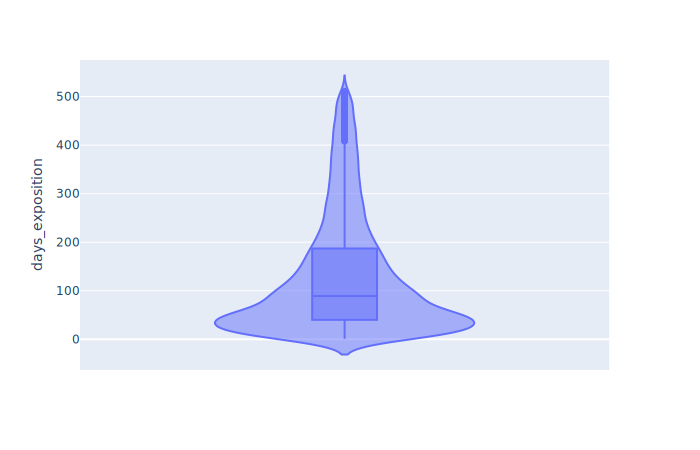

In [61]:
func_plotly(good_days_exposition, 'days_exposition')

count    18306.000000
mean       130.669835
std        122.577483
min          1.000000
25%         40.000000
50%         89.000000
75%        187.000000
max        511.000000
Name: days_exposition, dtype: float64

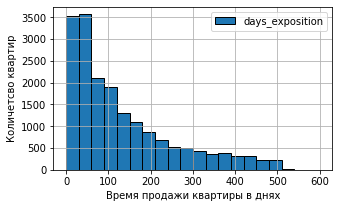

In [62]:
gde = func_plot(good_days_exposition, 'days_exposition', 600)
gde.set_xlabel('Время продажи квартиры в днях')
gde.set_ylabel('Количетсво квартир');
good_days_exposition['days_exposition'].describe()

In [63]:
good_days_exposition['days_exposition'].value_counts()

45.0     880
7.0      234
30.0     208
90.0     204
4.0      176
        ... 
492.0      4
2.0        3
508.0      3
373.0      3
1.0        1
Name: days_exposition, Length: 510, dtype: int64

**Вывод:**
Данные стали более чистыми и реальными, среднее значение меньше отклоняется от медианы.
Сильно выбивающиеся дни (45,60) скорее всего связаны с автоудалением из-за неактивности объявления.


### Какие факторы больше всего влияют на стоимость квартиры?

**Посмотрим** зависит-ли цена от площади.

In [71]:
def pivot_func (df, index):
    pt = df.pivot_table(index = index,
                        values = 'price_per_meter',
                        aggfunc = ['mean', 'count', 'median']
                       )
    pt.columns = ['mean', 'count', 'median']
    return pt

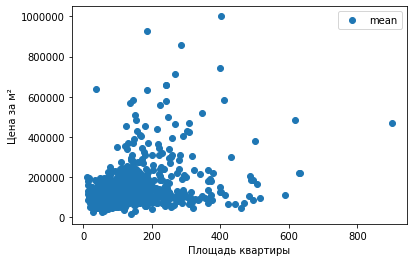

In [72]:
pta = pivot_func(data, 'total_area').plot(y = 'mean', style = 'o')
pta.set_xlabel('Площадь квартиры')
pta.set_ylabel('Цена за м²');

In [73]:
data['total_area'].corr(data['price_per_meter']) # Вычисление коэффициента корреляции Пирсона

0.30196014387792575

**Вывод:** Зависимоти цены от площади есть, но слабая. По корреляции Пирсона только 0,3 - это слабая связь этих двух показателей.
_______________________________________________________________________________________________________________________________
**Проверим** зависит-ли цена от числа комнат.

In [74]:
data['rooms'].corr(data['price_per_meter'])

0.055419499670592245

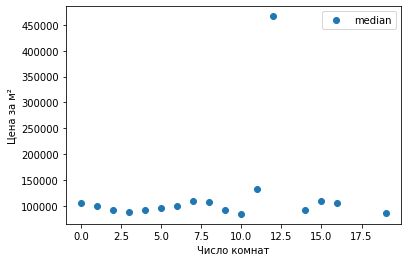

In [75]:
rpa = pivot_func(data, 'rooms').plot(y = 'median', style = 'o')
rpa.set_xlabel('Число комнат')
rpa.set_ylabel('Цена за м²');

**Вывод:** зависимости между ценой за метр и количеством комнат нет.
_______________________________________________________________________________________________________________________________
**Изучим** зависимость цены от удалённости от центра.

In [76]:
data['cityCenters_nearest'].corr(data['price_per_meter'])

-0.31795073682864683

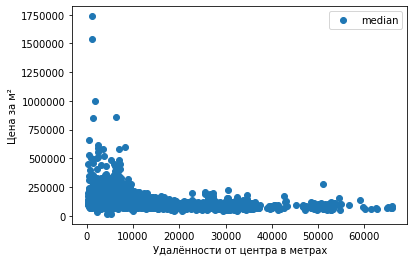

In [77]:
cnpa = pivot_func(data, 'cityCenters_nearest').plot(y = 'median', style = 'o')
cnpa.set_xlabel('Удалённости от центра в метрах')
cnpa.set_ylabel('Цена за м²');

**Вывод:** зависимость есть, хоть и слабая. Чем ближе к центру - тем дороже.

_______________________________________________________________________________________________________________________________
**Изучим** зависимость цены от того, на каком этаже расположена квартира.

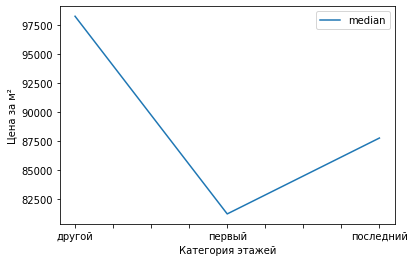

In [78]:
fcpa = pivot_func(data, 'floor_category').plot(y = 'median')
fcpa.set_xlabel('Категория этажей')
fcpa.set_ylabel('Цена за м²');

**Вывод:** Первый этаж обходится дешевле, чем последний, а последний дешевле чем любой другой.

_______________________________________________________________________________________________________________________________
**Изучим** зависимость от даты размещения: дня недели, месяца и года.

Начинаем с дня недели.

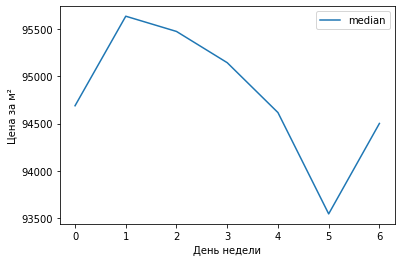

In [79]:
wepa = pivot_func(data, 'weekday_exposition').plot(y = 'median')
wepa.set_xlabel('День недели')
wepa.set_ylabel('Цена за м²');

**Вывод:** Существует легенда, если размещать продажу недвижимости во вторник, то будешь богаче. Чётко видно, что в течении недели цены больше чем в субботу и после субботы начинают востанавливаться. С чем это связано я даже не могу представить,возможно, какие-то добрые люди в свой выходной решили скинуть пару тыщ, а может быть просто из-за того, что в выходные объявления выстовляют в 2 раза реже, чем в будни.

Проверяем месяцы.

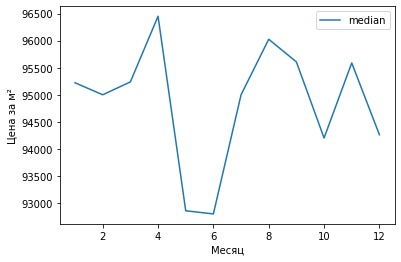

In [80]:
mepa = pivot_func(data, 'month_exposition').plot(y = 'median')
mepa.set_xlabel('Месяц')
mepa.set_ylabel('Цена за м²');

**Вывод:** Присутсвует сезонность Есть небольшой провал с мая по июнь, весна хорошое время для размещения о продаже. 

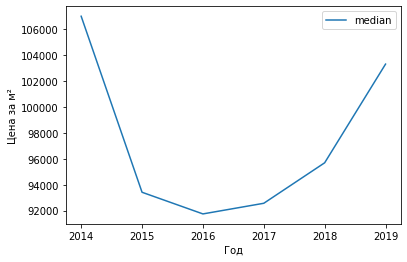

In [81]:
yepa = pivot_func(data, 'year_exposition').plot(y = 'median')
yepa.set_xlabel('Год')
yepa.set_ylabel('Цена за м²');

**Вывод:** 2014 год подкосил цены достаточно сильно, но рынок недвижимости восстанавливается. Заметна огромная разница в количестве объявлений. Кто успел купить в 2016, тот молодец.
_______________________________________________________________________________________________________________________________

<a id='step4.5'></a>
**4.5** Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [82]:
locality_pivot_table = data.pivot_table(index = 'locality_name', 
                                        values = 'price_per_meter', 
                                        aggfunc=['count', 'mean', 'median', 'min', 'max']
                                       )
locality_pivot_table.columns = ['count', 'mean', 'median', 'min', 'max']
locality_pivot_table = (locality_pivot_table
                        .sort_values('count', ascending = False)
                        .head(10)
                       )
print(locality_pivot_table)

                   count           mean    median    min      max
locality_name                                                    
Санкт-Петербург    15770  114784.747242  104714.5    111  1907500
посёлок Мурино       522   85751.733716   85878.0  50000   138580
посёлок Шушары       440   78676.904545   76876.0  47700   147826
Всеволожск           398   68654.007538   65789.0  31400   640422
Пушкин               369  103125.373984  100000.0  59836   256521
Колпино              338   75424.150888   74723.5  47957   125000
посёлок Парголово    327   90175.489297   91642.0  39205   138522
Гатчина              307   68745.693811   67796.0  10507   146315
деревня Кудрово      299   92473.086957   91860.0  54160   142857
Выборг               237   58141.489451   58158.0  18750   107473


In [83]:
locality_pivot_table.sort_values('mean')

,count,mean,median,min,max
locality_name,,,,,
Выборг,237,58141.489451,58158.0,18750,107473
Всеволожск,398,68654.007538,65789.0,31400,640422
Гатчина,307,68745.693811,67796.0,10507,146315
Колпино,338,75424.150888,74723.5,47957,125000
посёлок Шушары,440,78676.904545,76876.0,47700,147826
посёлок Мурино,522,85751.733716,85878.0,50000,138580
посёлок Парголово,327,90175.489297,91642.0,39205,138522
деревня Кудрово,299,92473.086957,91860.0,54160,142857
Пушкин,369,103125.373984,100000.0,59836,256521


**Вывод:** По средней стоимости дешевле всех оказался выбор, а самым дорогим Санкт-Петербург. И не просто самым дорогим, а в среднем в 2 раза дороже!
_______________________________________________________________________________________________________________________________

### Изучим предложения квартир

In [84]:
pivot_table_cityCenters_nearest_km = (data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=13')
                                      .pivot_table(index = 'cityCenters_nearest_km', 
                                                   values = 'price_per_meter'
                                                  )
                                     )
pivot_table_cityCenters_nearest_km.columns = ['mean']
pivot_table_cityCenters_nearest_km

,mean
cityCenters_nearest_km,
0,187323.674419
1,166441.743802
2,146662.420195
3,129369.694340
4,137147.834061
5,146873.966234
6,152277.455319
7,141399.287469
8,120377.781065


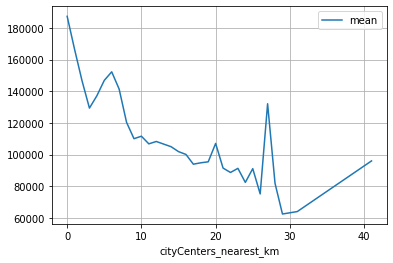

In [85]:
pivot_table_cityCenters_nearest_km.plot(y = 'mean', grid = True)

**Вывод:** По данным и графику видно, что граница центра примерно 6-7км.
_______________________________________________________________________________________________________________________________

<a id='step4.7'></a>
**4.7** Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [86]:
spb_center = data.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')
spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,6,408176,4,7,2015,другой,NaN,NaN
24,8,6500000,97.20,2015-10-31,2,2.65,3,46.5,1,False,False,False,19.60,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265.0,2,66872,5,10,2015,первый,0.478395,0.201646
35,6,15500000,149.00,2017-06-26,5,2.65,5,104.0,4,False,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0,NaN,1,779.0,644.0,3,104026,0,6,2017,другой,0.697987,0.114094
51,7,45000000,161.00,2017-10-17,3,3.20,8,38.0,4,False,False,False,50.00,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,541.0,6,279503,1,10,2017,другой,0.236025,0.310559
52,20,11795000,136.00,2017-09-22,6,3.00,2,94.0,2,False,False,False,11.00,1,Санкт-Петербург,16510.0,6582.0,1,526.0,0,NaN,NaN,6,86727,4,9,2017,последний,0.691176,0.080882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.00,2016-05-20,1,2.65,6,18.2,1,False,False,False,14.60,0,Санкт-Петербург,20503.0,4946.0,2,624.0,1,519.0,131.0,4,90425,4,5,2016,первый,0.387234,0.310638
23681,13,5250000,43.00,2018-05-11,2,2.50,5,29.0,2,False,False,False,6.00,0,Санкт-Петербург,28323.0,7262.0,1,497.0,2,660.0,80.0,7,122093,4,5,2018,другой,0.674419,0.139535
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,6,105769,3,7,2018,другой,0.596154,0.115385
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,4,129903,3,10,2016,другой,0.552812,0.145405


**Проверяем** зависимость от числа комнат.

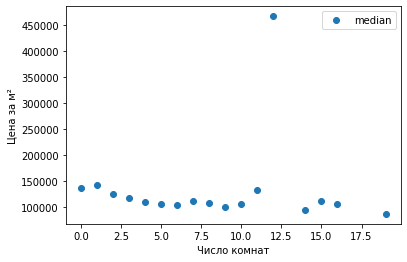

In [87]:
spb_center_rooms = pivot_func(spb_center, 'rooms').plot(y = 'median', style = 'o')
spb_center_rooms.set_xlabel('Число комнат')
spb_center_rooms.set_ylabel('Цена за м²');

In [88]:
spb_center['rooms'].corr(spb_center['price_per_meter'])

0.005893674060847008

**Вывод:** Наша выборка не отличается от общих данных. Зависимости по комнатам нет.

_______________________________________________________________________________________________________________________________
**Проверяем** зависимость от этажа.

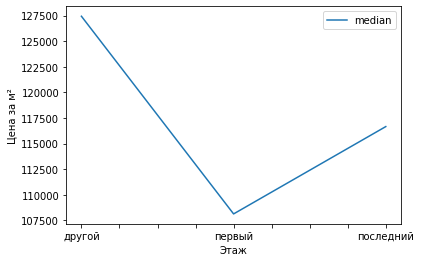

In [89]:
spb_center_floor_category = pivot_func(spb_center, 'floor_category').plot(y = 'median')
spb_center_floor_category.set_xlabel('Этаж')
spb_center_floor_category.set_ylabel('Цена за м²');

**Вывод:** Всё тот же более дешёвый первый этаж и немного дороже последний. Выборка не отличается от основного df.
_______________________________________________________________________________________________________________________________
**Проверяем** зависимость удалённости от центра. В данном случае от прям центра центра)

-0.03058325109347526

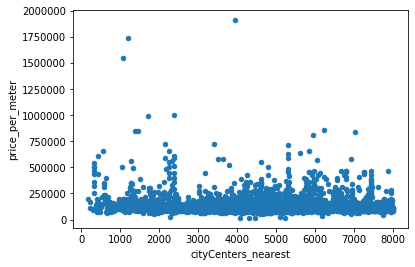

In [90]:
spb_center.plot(kind = 'scatter', 
                y = 'price_per_meter', 
                x = 'cityCenters_nearest'
               )

spb_center['cityCenters_nearest'].corr(spb_center['price_per_meter'])

**Вывод:** И здесь мы уже видим, что зависимости нет (ведь это и есть центр). В основном df прослеживалась зависимость цены от растояния до центра, но когда мы взяли выборку по центру она пропала. 

_______________________________________________________________________________________________________________________________
**Переходим** к датам размещения объявления.

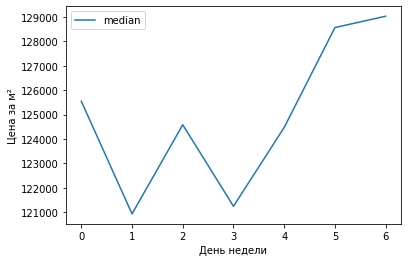

In [91]:
# Начнём с дней.
spb_center_weekday_exposition = pivot_func(spb_center, 'weekday_exposition').plot(y = 'median')
spb_center_weekday_exposition.set_xlabel('День недели')
spb_center_weekday_exposition.set_ylabel('Цена за м²');

**Вывод:** выборка сильно отличается, от общих данных. Выходные отличаются своими высокими ценами, но объявлений в эти дни всё еще меньше остальной недели, как и в основных данных. Живёшь в центре и не знаешь, чем занятся в выходные? Выстави объявления о продаже квартиры!

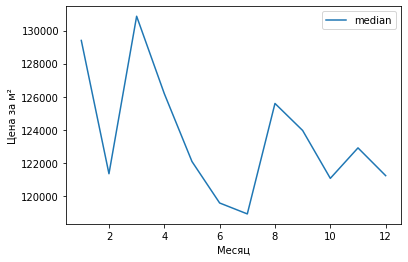

In [92]:
#Продолжаем с месяцами.
spb_center_month_exposition = pivot_func(spb_center, 'month_exposition').plot(y = 'median');
spb_center_month_exposition.set_xlabel('Месяц')
spb_center_month_exposition.set_ylabel('Цена за м²');

**Вывод:** Весна всё еще благоприятна для продаже, как и в общих данных. Видна сильная разница между 12 и 1 месяцем. Новый год - новые цены.

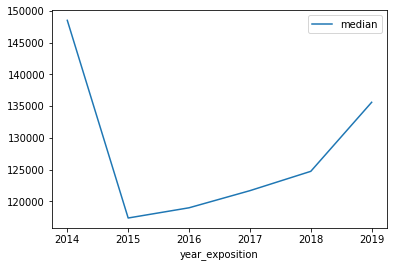

In [93]:
#Заканчиваем годами.
spb_center_year_exposition = pivot_func(spb_center, 'year_exposition').plot(y = 'median');
spb_center_month_exposition.set_xlabel('Год')
spb_center_month_exposition.set_ylabel('Цена за м²');

**Вывод:** Всё таже картина. Правда с одним отличием. Лучшая точка для покупки была в 2015, а не в 2016, как было на основном df. Да и востанавливаются цены на квартиры в центре чуть медленнее.

## Общий вывод

Мы обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. 

Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 

Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. 

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют этаж квартиры , близость к центру и год размещения.

Незначительно на стоимость квадратного метра влияют день, месяц (выявили сезонность) и общая площадь.

А главное мы нашли аномалию: В центре Санкт-Петербурге объявления выставленные в выходные - дороже чем в будни. Когда по всему остальному Санкт-Петербургу и соседних населённых пунктов - дешевле чем в будни.